In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import glob  ###
data_path = Path('data') # change the data path here 


In [33]:
# IMAGES
import torch.nn.functional as F
import numpy as np
import torch.nn as nn
import torch
img_path ="data_HR/data/images/10.npy"
img = np.load(str(img_path))
print(img.shape)
print(np.min(img),np.max(img),np.mean(img), img.size)

(512, 512, 6)
5653 65535 33688.20453389486 1572864


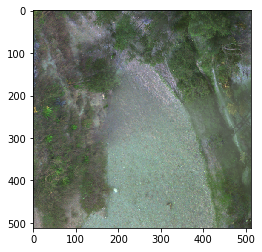

In [34]:
img = (img[:,:,:3]).astype(np.float)
#inp = (img*255).astype(np.uint8)
plt.imshow(img/np.max(img))
plt.show()


(512, 512, 3)


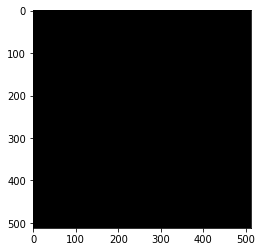

In [32]:
# MASKS
mask = np.load(str(img_path).replace('images', 'masks'), 0)
mask=(mask > 0).astype(np.uint8)
plt.imshow(mask)

print(mask.shape)

## Split: Train_val + Test

In [10]:
from get_train_val_1 import split_train_val
#from get_test_2 import split_train_test
from transfer_maks_4 import obtained_mask
#from copy_samples_3 import n_samples
split_train_val(original_dataset_dir= 'data_HR/data/images',base_dir = "data_HR",validation_split = 0.10, train_file='train_val',val_file='test')

2493 2244 249


In [11]:
obtained_mask(mode="val",original_dataset_dir_train="data_HR/train_val/images/",label_dir_train='data_HR/data/masks/',data_dir_train="data_HR/train_val/masks" ,original_dataset_dir_val="data_HR/test/images",label_dir_val='data_HR/data/masks/',data_dir_val="data_HR/test/masks/")

data_HR/train_val/images/
data_HR/test/images


In [27]:
import torch
rootdata='data_HR'
data_path = Path(rootdata)

data_all_raiz=str(data_path/'train_val'/'images')  #'/home/jgonzalez/Test_2019/Test_PreProcessing/data' #all the dataset
get_files_path = str(data_all_raiz) + "/*.npy"
data_all_root = np.array(sorted(glob.glob(get_files_path)))
#loader = np.load(path) #.transpose(1,2,0) # 
        
mean = 0.
meansq = 0.
for path_data in data_all_root:
    data = np.load(path_data)
    mean = data.mean()
    meansq = (data**2).mean()

std = torch.sqrt(meansq - mean**2)
print("mean: " + str(mean))
print("std: " + str(std))
print()


TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not numpy.float64

In [28]:
mean = 0.
std = 0.
nb_samples = 0.
for path_data in data_all_root:
    data = np.load(path_data)

    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

TypeError: 'int' object is not callable

In [31]:
    mean_all=[]
    std_all=[]
    #mean_pixel= []
    size=len(im_pths)
    #print('fid_max_size',size)

    for path_data in data_all_root:
        img = np.load(str(path_data))
        batch_samples = img.size(2)

        
        #print(np.max(img))
        img=img #.transpose((2, 1, 0))
        #print(np.shape(img))
        mean_all.append(np.mean(img))
        std_all.append(np.std(img))
        #mean_pixel.append(np.mean(img[:,:,0]))
    #print(np.mean(mean_pixel))
    print( (mean_all),(std_all))
        

[28249.590837478638, 26765.258009592693, 33688.20453389486, 29851.772109349567, 29121.97948328654, 26964.37707710266, 25921.496952056885, 27801.482716242474, 27055.353916168213, 27627.93929417928, 26620.415178934734, 28075.62110265096, 28249.18459892273, 25937.939441045124, 26833.306407928467, 27878.821972529095, 28693.901613235474, 27134.34840075175, 27126.80322964986, 25062.125323613483, 23809.66235287984, 30903.8804620107, 28370.38424428304, 29217.882684071858, 27190.134358723957, 27665.582668940227, 21723.034309387207, 28674.70960553487, 30189.943614959717, 28817.359375635784, 28482.20299084981, 27126.01766014099, 28083.494441986084, 28035.636501312256, 26521.94633801778, 28508.90567970276, 25698.658126831055, 30551.841325759888, 30225.976501464844, 32689.826738357544, 28063.067726771038, 31836.65607070923, 28994.180562973022, 29247.247821172077, 29565.788787841797, 32252.806505203247, 30937.859601338703, 29449.801127115887, 23734.507363001507, 28239.334000269573, 26724.10924657185